In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
diabetes = pd.read_csv('../Files/diabetes.csv')
print(diabetes)

       PatientID  Pregnancies  PlasmaGlucose  DiastolicBloodPressure  \
0        1354778            0            171                      80   
1        1147438            8             92                      93   
2        1640031            7            115                      47   
3        1883350            9            103                      78   
4        1424119            1             85                      59   
...          ...          ...            ...                     ...   
14995    1490300           10             65                      60   
14996    1744410            2             73                      66   
14997    1742742            0             93                      89   
14998    1099353            0            132                      98   
14999    1386396            3            114                      65   

       TricepsThickness  SerumInsulin        BMI  DiabetesPedigree  Age  \
0                    34            23  43.509726          1.

In [3]:
features = ['Pregnancies','PlasmaGlucose','DiastolicBloodPressure','TricepsThickness','SerumInsulin','BMI','DiabetesPedigree','Age']
target = 'Diabetic'
X, y = diabetes[features], diabetes[target]
print('X:')
display(X)
print('\ny:')
display(y)

X:


,Pregnancies,PlasmaGlucose,DiastolicBloodPressure,TricepsThickness,SerumInsulin,BMI,DiabetesPedigree,Age
0,0,171,80,34,23,43.509726,1.213191,21
1,8,92,93,47,36,21.240576,0.158365,23
2,7,115,47,52,35,41.511523,0.079019,23
3,9,103,78,25,304,29.582192,1.282870,43
4,1,85,59,27,35,42.604536,0.549542,22
...,...,...,...,...,...,...,...,...
14995,10,65,60,46,177,33.512468,0.148327,41
14996,2,73,66,27,168,30.132636,0.862252,38
14997,0,93,89,43,57,18.690683,0.427049,24
14998,0,132,98,18,161,19.791645,0.302257,23



y:


0        0
1        0
2        0
3        1
4        0
        ..
14995    1
14996    1
14997    0
14998    0
14999    1
Name: Diabetic, Length: 15000, dtype: int64

###### Jaki procent był diabetykami (33%)

In [4]:
pd.Series(y).value_counts(normalize=True)

Diabetic
0    0.666667
1    0.333333
Name: proportion, dtype: float64

###### Sprawdźmy typy danych oraz czy są metody brakujące

In [5]:
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   PatientID               15000 non-null  int64  
 1   Pregnancies             15000 non-null  int64  
 2   PlasmaGlucose           15000 non-null  int64  
 3   DiastolicBloodPressure  15000 non-null  int64  
 4   TricepsThickness        15000 non-null  int64  
 5   SerumInsulin            15000 non-null  int64  
 6   BMI                     15000 non-null  float64
 7   DiabetesPedigree        15000 non-null  float64
 8   Age                     15000 non-null  int64  
 9   Diabetic                15000 non-null  int64  
dtypes: float64(2), int64(8)
memory usage: 1.1 MB


###### Sprawdzamy rozkłady

In [6]:
X.describe()

,Pregnancies,PlasmaGlucose,DiastolicBloodPressure,TricepsThickness,SerumInsulin,BMI,DiabetesPedigree,Age
count,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,3.224533,107.856867,71.220667,28.814000,137.852133,31.509646,0.398968,30.137733
std,3.391020,31.981975,16.758716,14.555716,133.068252,9.759000,0.377944,12.089703
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200512,0.078044,21.000000
25%,0.000000,84.000000,58.000000,15.000000,39.000000,21.259887,0.137743,22.000000
50%,2.000000,104.000000,72.000000,31.000000,83.000000,31.767940,0.200297,24.000000
75%,6.000000,129.000000,85.000000,41.000000,195.000000,39.259692,0.616285,35.000000
max,14.000000,192.000000,117.000000,93.000000,799.000000,56.034628,2.301594,77.000000


###### Stwórzmy wykresy pudełkowe dla każdej zmiennej

Unique values: 15


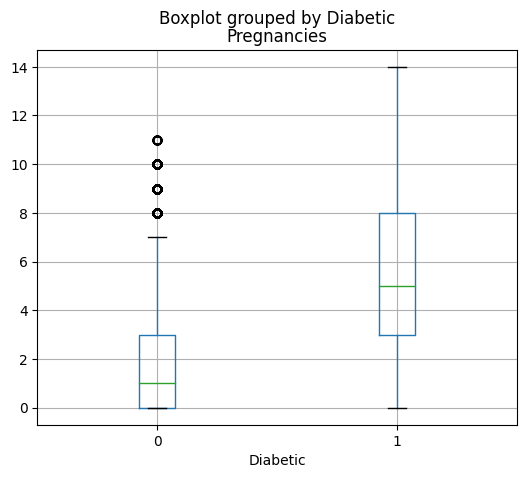

Unique values: 149


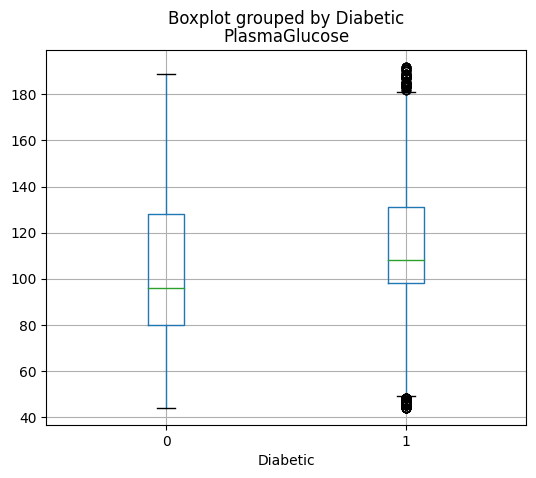

Unique values: 90


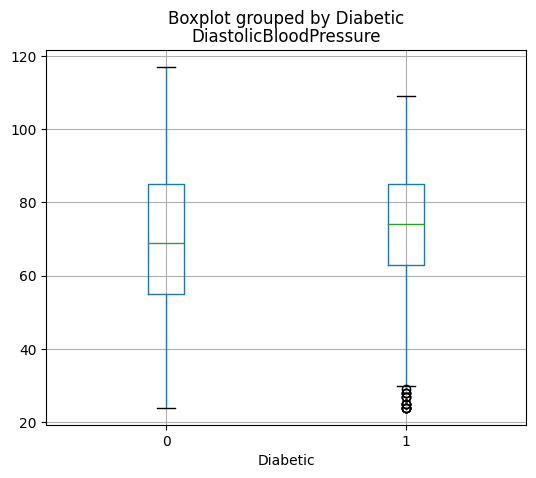

Unique values: 69


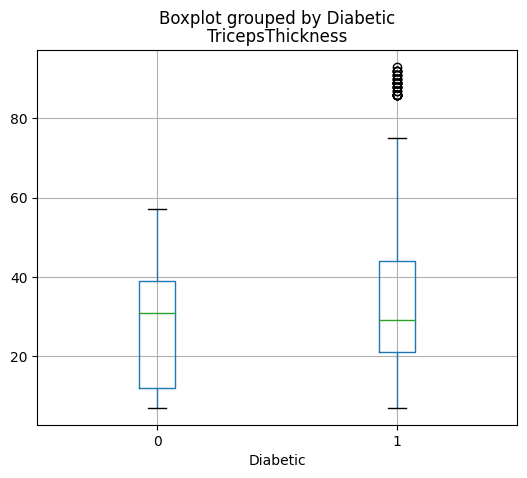

Unique values: 663


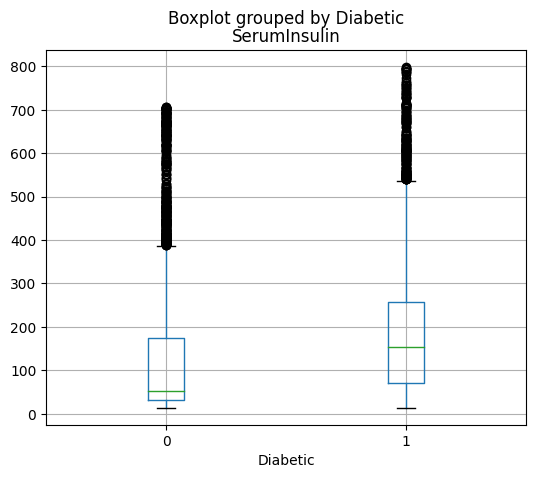

Unique values: 15000


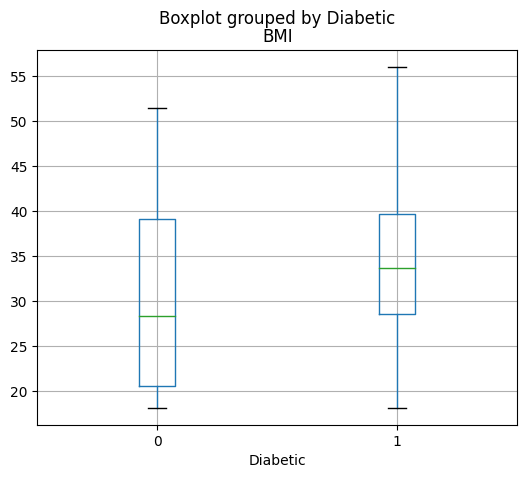

Unique values: 14999


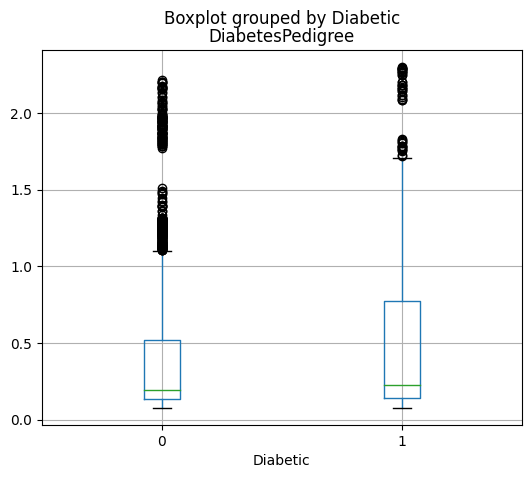

Unique values: 56


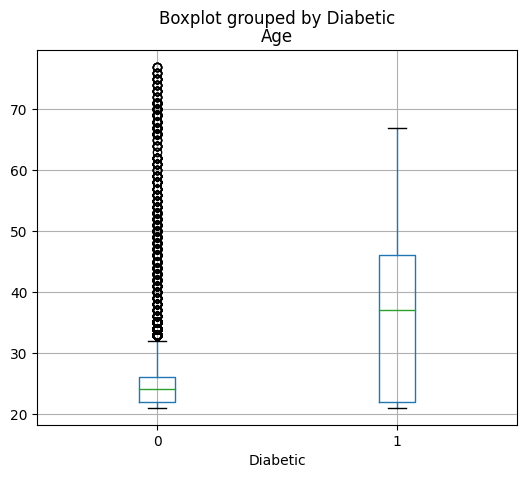

In [7]:
for col in features:
    print(f'Unique values: {len(diabetes[col].unique())}')
    diabetes.boxplot(column=col, by='Diabetic', figsize=(6,5))
    plt.title(col)
    plt.show()

###### Histogramy w zależności od naszej zmiennej objaśnianej

<Figure size 1200x250 with 0 Axes>

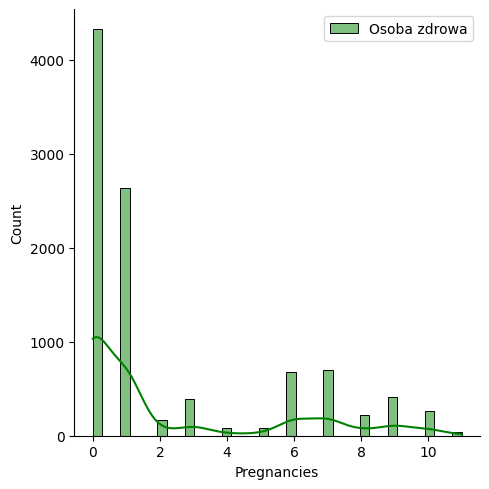

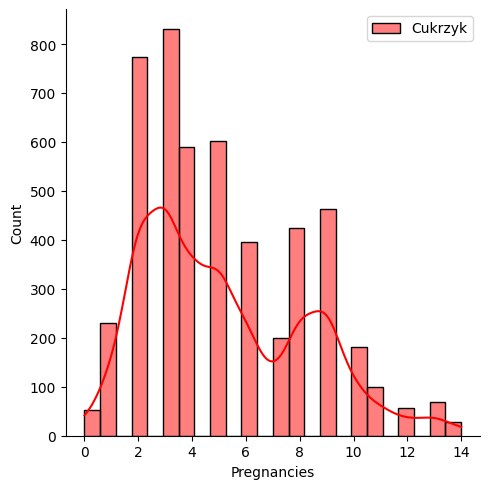

<Figure size 1200x250 with 0 Axes>

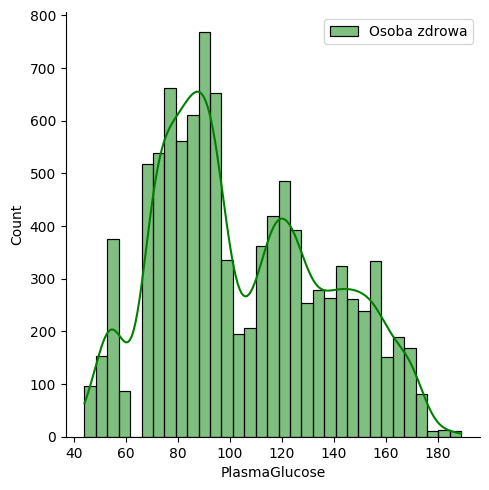

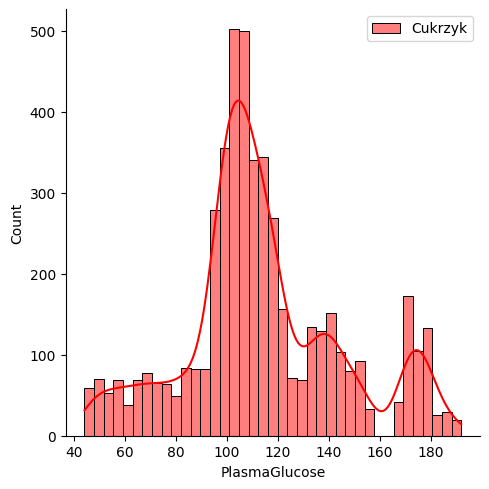

<Figure size 1200x250 with 0 Axes>

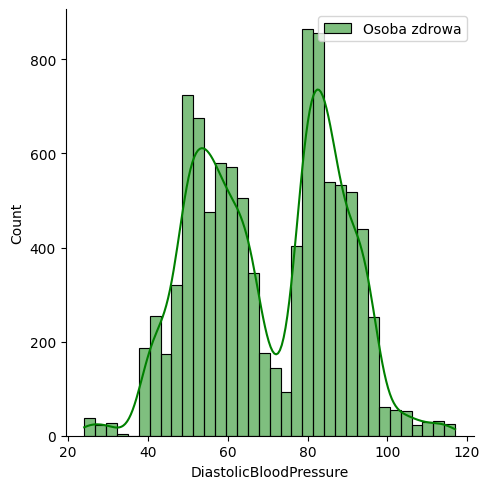

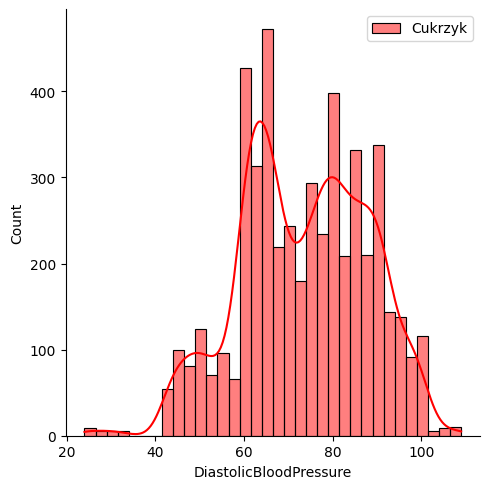

<Figure size 1200x250 with 0 Axes>

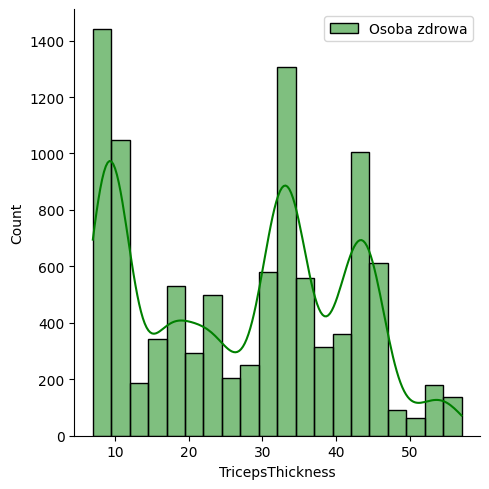

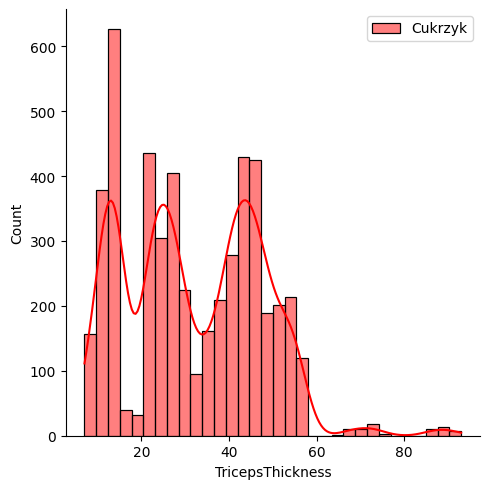

<Figure size 1200x250 with 0 Axes>

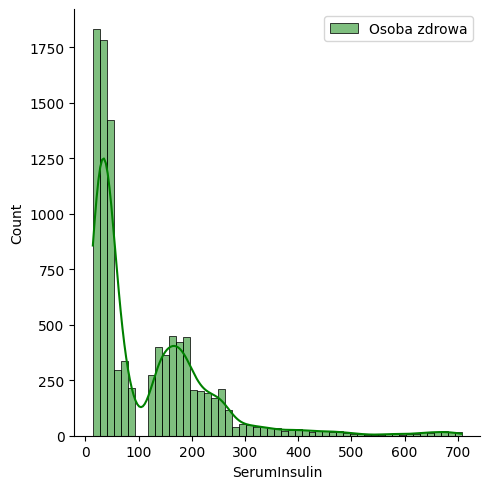

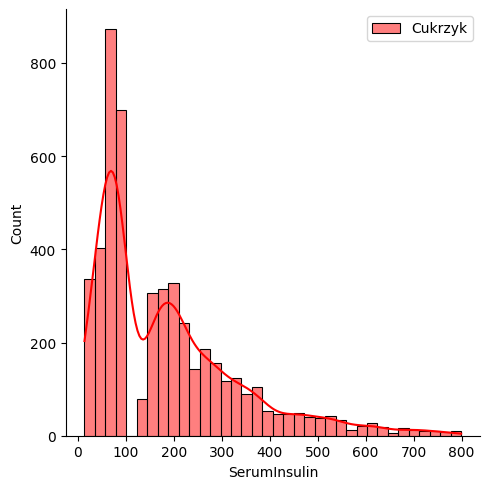

<Figure size 1200x250 with 0 Axes>

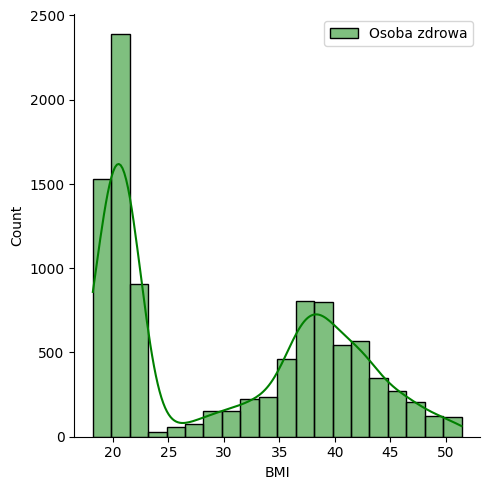

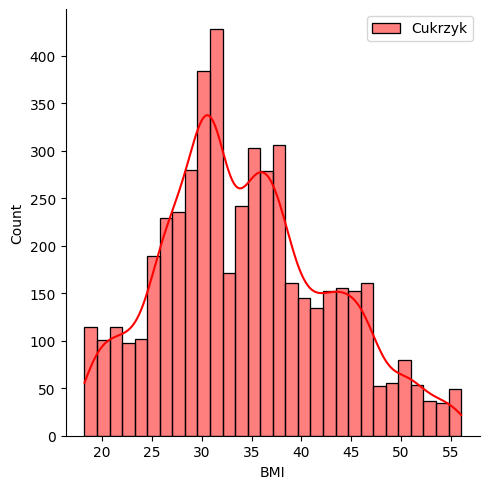

<Figure size 1200x250 with 0 Axes>

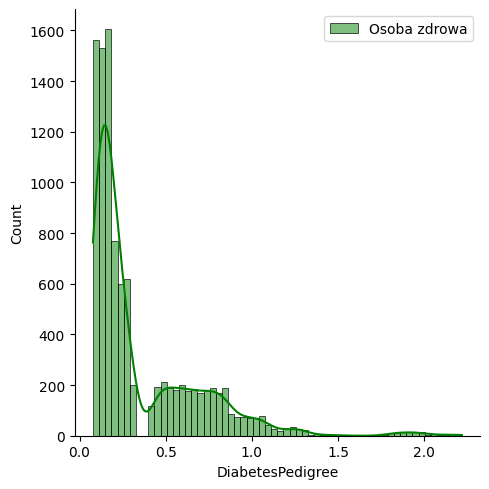

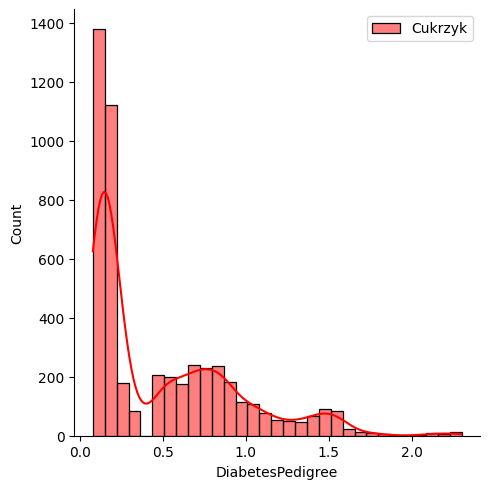

<Figure size 1200x250 with 0 Axes>

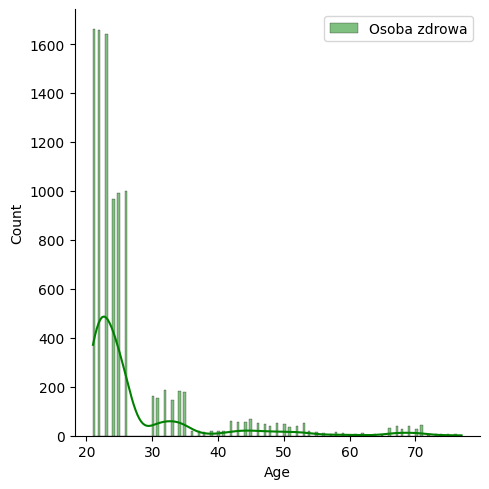

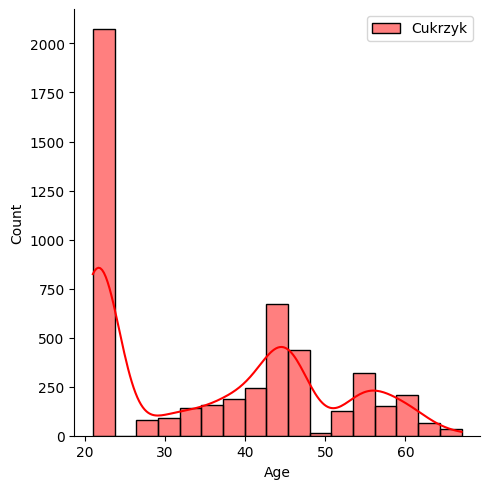

In [8]:
for col in features:
    plt.figure(figsize=(12, 2.5))
    sns.displot(diabetes.loc[diabetes['Diabetic']==0, col], kde=True, color='green', label='Osoba zdrowa')
    plt.legend(loc='upper right')
    sns.displot(diabetes.loc[diabetes['Diabetic']==1, col], kde=True, color='red', label='Cukrzyk')
    plt.legend(loc='upper right')
    plt.show()

###### Histogram

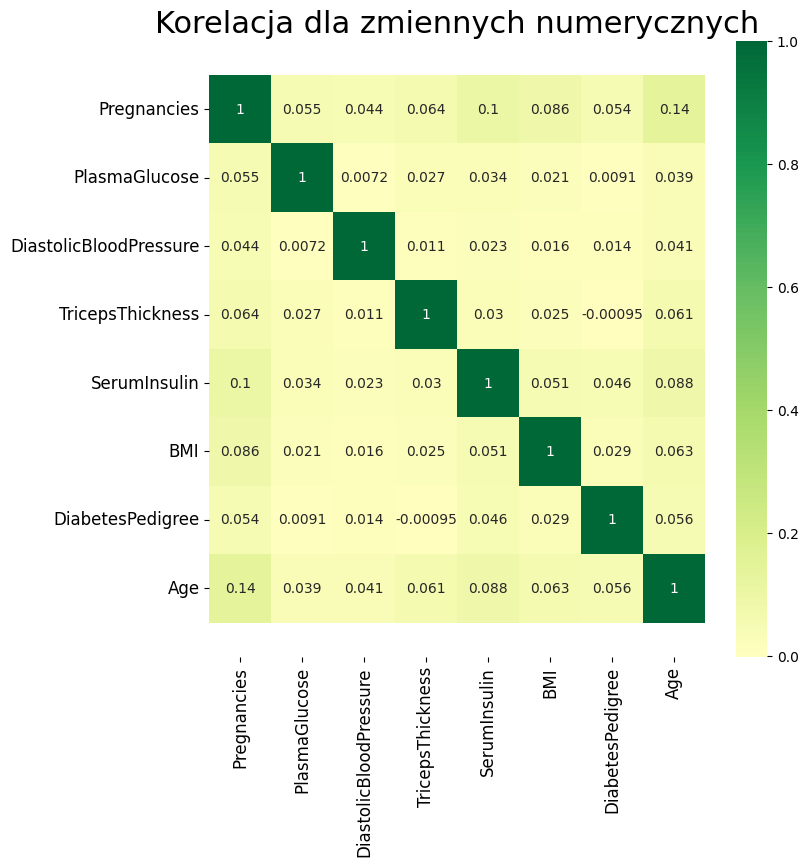

In [9]:
plt.figure(figsize=(8,8))
ax = sns.heatmap(X.corr(),
                 xticklabels=X.corr().columns,
                 yticklabels=X.corr().columns,
                 cmap='RdYlGn',
                 center=0,
                 annot=True)
plt.title('Korelacja dla zmiennych numerycznych', fontsize=22)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

###### Nie możemy tutaj policzyć korelacji Pearsona pomiędzy zmiennymi objaśniającymi a zmienną objaśnianą, ponieważ y to zmienna kategoryczna

###### Aby policzyć korelację pomiędzy zmienną numeryczną a kategoryczną zastosować możemy współczynnik korelacji punktowo-dwuseryjnej (Point-biserial correlation coefficient).

In [10]:
from scipy import stats
corr_dict = {}
for col in features:
    corr_dict[col] = stats.pointbiserialr(X[col], y)[0]
pd.Series(corr_dict).sort_values(ascending=False)

Pregnancies               0.407315
Age                       0.342605
SerumInsulin              0.247375
BMI                       0.210508
DiabetesPedigree          0.170302
TricepsThickness          0.152505
PlasmaGlucose             0.128004
DiastolicBloodPressure    0.091307
dtype: float64

###### Potwierdziliśmy wcześniej wyciągnięte wnioski, że cukrzyca najbardziej zależna jest od ciąży i od wieku

###### Dzielimy dane na treningowe i testowe
###### Korzystamy z parametru 'stratify' i przypiszemy tam y, dzięki czemu oba zbiory będą zawierać taki sam procent próbek z każdej klasy

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X[['Pregnancies', 'Age']], y, test_size=0.30, random_state=0, stratify=y)
print('Treningowe obserwacje: %d\nTestowe obserwacje: %d' % (X_train.shape[0], X_test.shape[0]))

Treningowe obserwacje: 10500
Testowe obserwacje: 4500


### Regresja logistyczna

###### Jeśli prawdopodobieństwo jest większe niż 50% to model wybiera klasę 1, w przeciwnym przypadku klasę 0

In [12]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

scaler_2var = StandardScaler()
X_train_standardized = scaler_2var.fit_transform(X_train)
X_test_standardized = scaler_2var.transform(X_test)
model_lr = LogisticRegression()
model_lr.fit(X_train_standardized, y_train)

LogisticRegression()

###### Zanim przejdziemy do oceny naszego modelu, możemy zwizualizować na podstawie jakich wartości model oddziela dwie klasy, zatem zwizualizujmy działanie naszego klasyfikatora. Do tego wykorzystajmy poniższą funkcję:

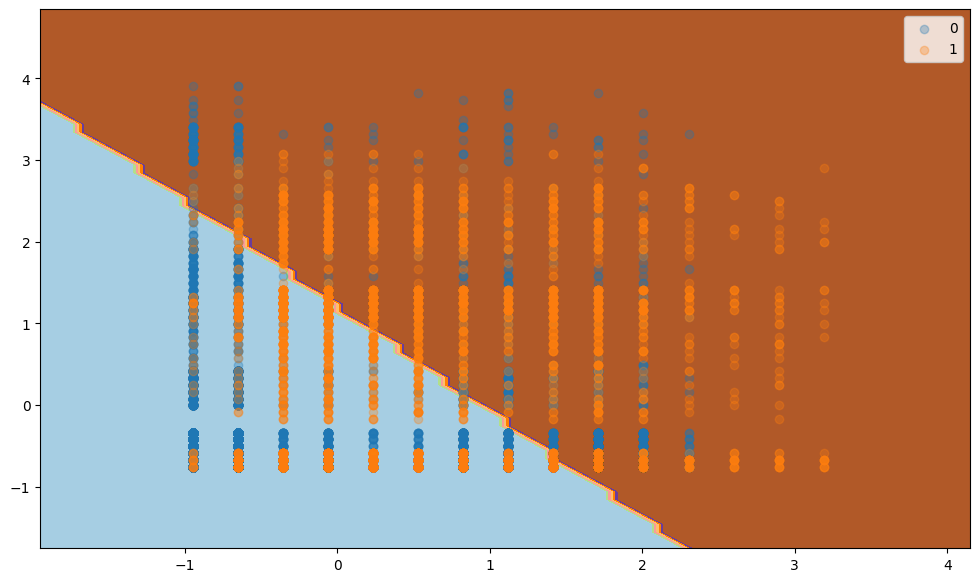

In [13]:
from numpy import where
from numpy import meshgrid
from numpy import arange
from numpy import hstack

def plot_classification_surface(X_plot, y_plot, trained_model):
    plt.figure(figsize=(12, 7))

    # określenie granic zbioru
    min1, max1 = X_plot[:, 0].min()-1, X_plot[:, 0].max()+1
    min2, max2 = X_plot[:, 1].min()-1, X_plot[:, 1].max()+1

    # skalowanie dla obu osi
    x1grid = arange(min1, max1, 0.1)
    x2grid = arange(min2, max2, 0.1)

    # utworzenie siatki
    xx, yy = meshgrid(x1grid, x2grid)

    # przetworzenie siatki w wektor
    r1, r2 = xx.flatten(), yy.flatten()
    r1, r2 = r1.reshape((len(r1), 1)), r2.reshape((len(r2), 1))

    # stworzenie zmiennych objaśniających dla modelu
    grid = hstack((r1,r2))

    # predykcja modelu zbioru
    yhat = trained_model.predict(grid)

    # przetworzenie predykcji na decyzji dla konkretnego punktu wykresu
    zz = yhat.reshape(xx.shape)

    # wizualizacja siatki z przyporządkowaną klasą
    plt.contourf(xx, yy, zz, cmap='Paired')

    # tworzenie wykresu punktowego dla klas ze zbioru X
    for class_value in range(2):

        # przyporządkowanie klasy (y) do obsewacji (X)
        row_ix = where(y_plot == class_value)

        # stworzenie wykresu punktowego
        plt.scatter(X_plot[row_ix, 0], X_plot[row_ix, 1], alpha=0.3, label=class_value)

    # wizualizacja wykresu
    plt.legend(loc='upper right')
    plt.show()

plot_classification_surface(X_plot=X_train_standardized, y_plot=y_train, trained_model=model_lr)

### Ocena modelu

###### Porównamy nasze prognozy z wartościami prawdziwym. Zróbmy tak zatem dla 5 pierwszych oraz 5 ostatnich wartości

In [14]:
predictions_lr = model_lr.predict(X_test_standardized)
print('Predicted labels: ', predictions_lr[:5], predictions_lr[-5:])
print('Actual labels:    ' , y_test[:5].values, y_test[-5:].values)

Predicted labels:  [0 0 1 0 0] [1 0 1 0 0]
Actual labels:     [0 1 0 0 0] [1 1 0 0 0]


###### Stosujemy metryki agregujące wyniki naszego modelu. Przykładem może być macierz omyłek

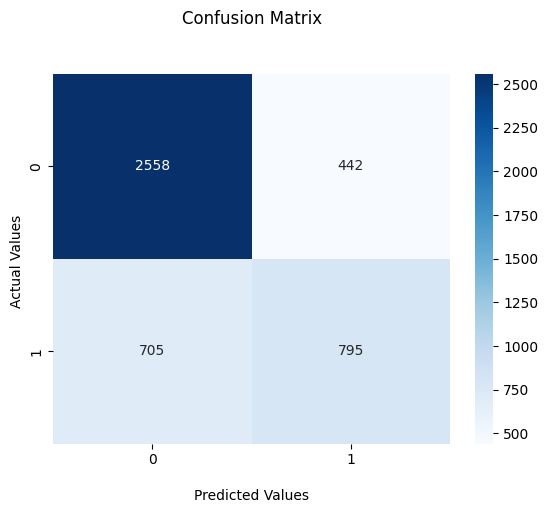

In [15]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_test, predictions_lr)
ax = sns.heatmap(cm, annot=True, cmap='Blues', fmt='.0f')
ax.set_title('Confusion Matrix\n\n')
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ')
plt.show()

###### Nasz model nie radzi sobie w pełni z rozdzieleniem obu klas. Gdy model wskazuje na klasę 1, to nie pokrywamy wszystkich obserwacji prawdziwych tej klasy (słaba czułość). Gdy model wskazuje tę klasę, to też 425 się myli (słaba precyzja). Policzmy zatem dokładność, precyzję, czułość oraz F1 score.

In [16]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

print('Accuracy: ', accuracy_score(y_test, predictions_lr))
print("Precision:", precision_score(y_test, predictions_lr))
print("Recall:", recall_score(y_test, predictions_lr))
print("F1_score:", f1_score(y_test, predictions_lr))

Accuracy:  0.7451111111111111
Precision: 0.6426839126919968
Recall: 0.53
F1_score: 0.5809280233832663


In [17]:
from sklearn.metrics import classification_report

print(classification_report(y_test, predictions_lr))

              precision    recall  f1-score   support

           0       0.78      0.85      0.82      3000
           1       0.64      0.53      0.58      1500

    accuracy                           0.75      4500
   macro avg       0.71      0.69      0.70      4500
weighted avg       0.74      0.75      0.74      4500



### Krzywa ROC

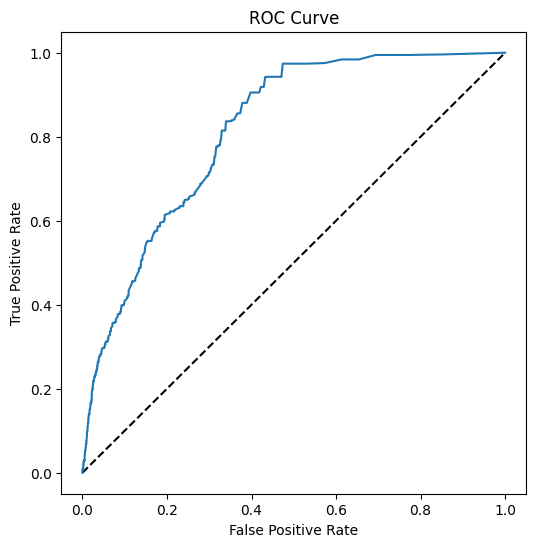

AUC: 0.8164931111111111


In [18]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

# prognoza prawdopodobieństwa
predictions_probability_lr = model_lr.predict_proba(X_test_standardized)

# obliczenie FPR oraz TPR w zależności od punktu odcięcia
fpr, tpr, thresholds = roc_curve(y_test, predictions_probability_lr[:,1])

# wizualizacja ROC Curve
fig = plt.figure(figsize=(6, 6))

# rysowanie prostej dla modelu losowego
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

# obliczenie AUC
auc = roc_auc_score(y_test, predictions_probability_lr[:,1])
print('AUC: ' + str(auc))

###### Funkcja rysująca najważniejsze modele

In [19]:
metrics_dataframe = pd.DataFrame(columns = ['Model', 'F1_score', 'AUC'])
metrics_dataframe
models = []
models_names = []
predictions_proba_list = []
def calculate_metrics(model, name, X_checked, y_checked):
    models.append(model)
    models_names.append(name)
    global metrics_dataframe
    predictions = model.predict(X_checked)
    predictions_proba = model.predict_proba(X_checked)
    predictions_proba_list.append(predictions_proba[:,1])

    ############## metryki dla sprawdzanego modelu ################
    # Precision, Recall, F1, Accuracy
    print(classification_report(y_checked, predictions))

    # Confusion matrix
    plt.figure()
    cm = confusion_matrix(y_checked, predictions)
    ax = sns.heatmap(cm, annot=True, cmap='Blues', fmt='.0f')
    ax.set_title('Confusion Matrix\n\n')
    ax.set_xlabel('\nPredicted Values')
    ax.set_ylabel('Actual Values ')
    plt.show()

    # plot ROC curve
    fig = plt.figure(figsize=(6, 6))
    plt.plot([0, 1], [0, 1], 'k--')
    for model_selected, name_selected, pred_proba in zip(models, models_names, predictions_proba_list):
        fpr, tpr, thresholds = roc_curve(y_checked, pred_proba)
        plt.plot(fpr, tpr, label=name_selected)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc='lower right')
    plt.show()

    f1_metric = f1_score(y_checked, predictions)
    auc_metric = roc_auc_score(y_checked, predictions_proba[:,1])
    metrics_dataframe = pd.concat([metrics_dataframe, pd.DataFrame({'Model': [name], 'F1_score': [f1_metric], 'AUC': [auc_metric]})], ignore_index=True)

    return metrics_dataframe

              precision    recall  f1-score   support

           0       0.78      0.85      0.82      3000
           1       0.64      0.53      0.58      1500

    accuracy                           0.75      4500
   macro avg       0.71      0.69      0.70      4500
weighted avg       0.74      0.75      0.74      4500



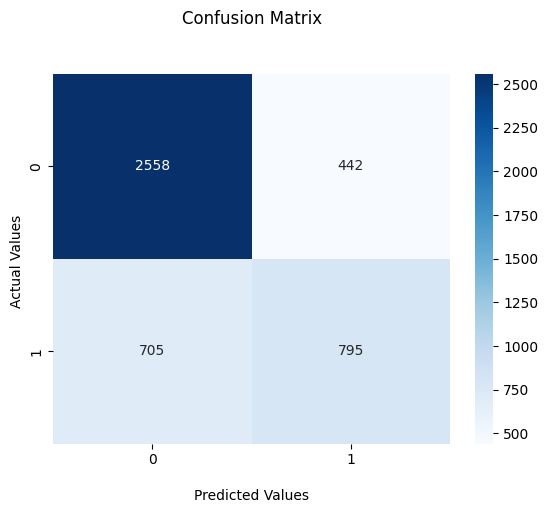

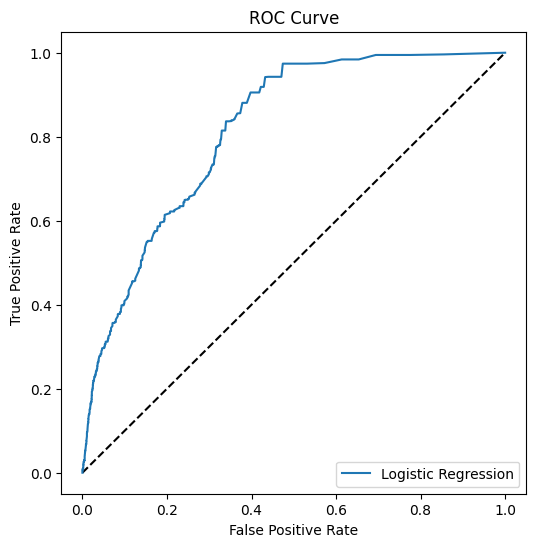

,Model,F1_score,AUC
0,Logistic Regression,0.580928,0.816493


In [20]:
calculate_metrics(model_lr, 'Logistic Regression', X_test_standardized, y_test)

# KNN (K Nearest Neighbours) – K najbliższych sąsiadów

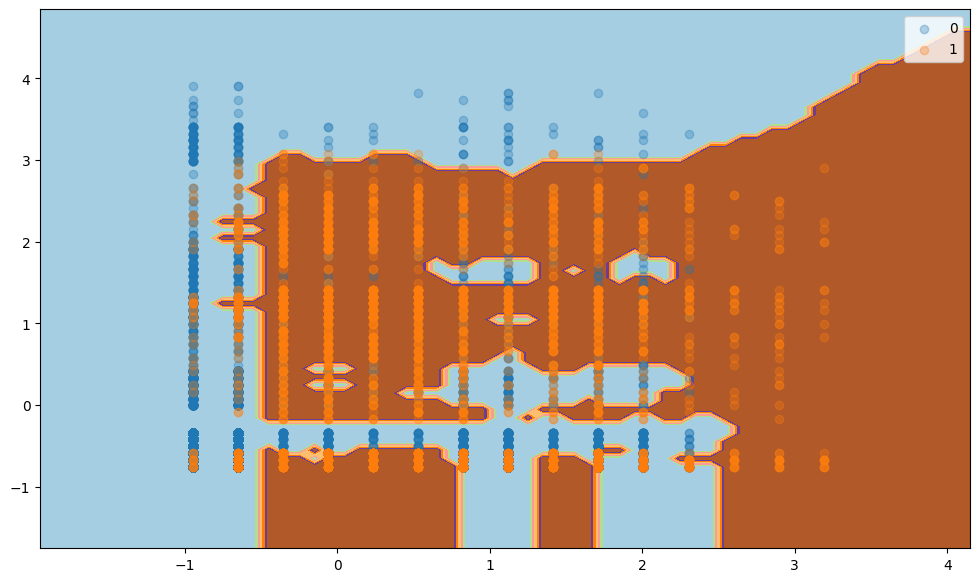

In [21]:
from sklearn.neighbors import KNeighborsClassifier

model_knn = KNeighborsClassifier(n_neighbors= int(X_train_standardized.shape[0]*0.001))
model_knn.fit(X_train_standardized, y_train)
plot_classification_surface(X_plot=X_train_standardized, y_plot=y_train, trained_model=model_knn)

              precision    recall  f1-score   support

           0       0.90      0.91      0.91      3000
           1       0.81      0.80      0.81      1500

    accuracy                           0.87      4500
   macro avg       0.86      0.86      0.86      4500
weighted avg       0.87      0.87      0.87      4500



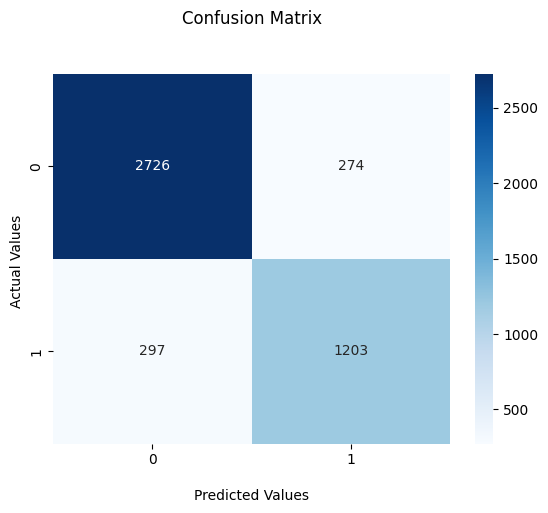

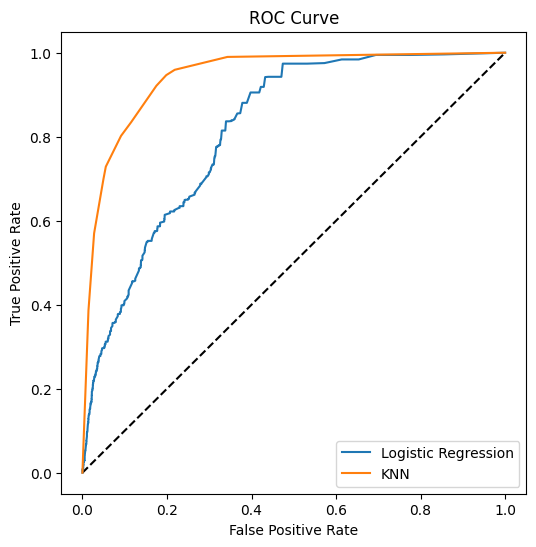

,Model,F1_score,AUC
0,Logistic Regression,0.580928,0.816493
1,KNN,0.808196,0.942804


In [22]:
calculate_metrics(model_knn, 'KNN', X_test_standardized, y_test)

# Drzewo decyzyjne

In [23]:
from sklearn.tree import DecisionTreeClassifier

model_tree = DecisionTreeClassifier(max_depth=3, min_samples_leaf=int(X_train.shape[0]*0.001))
model_tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, min_samples_leaf=10)

C:\Users\GTata\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


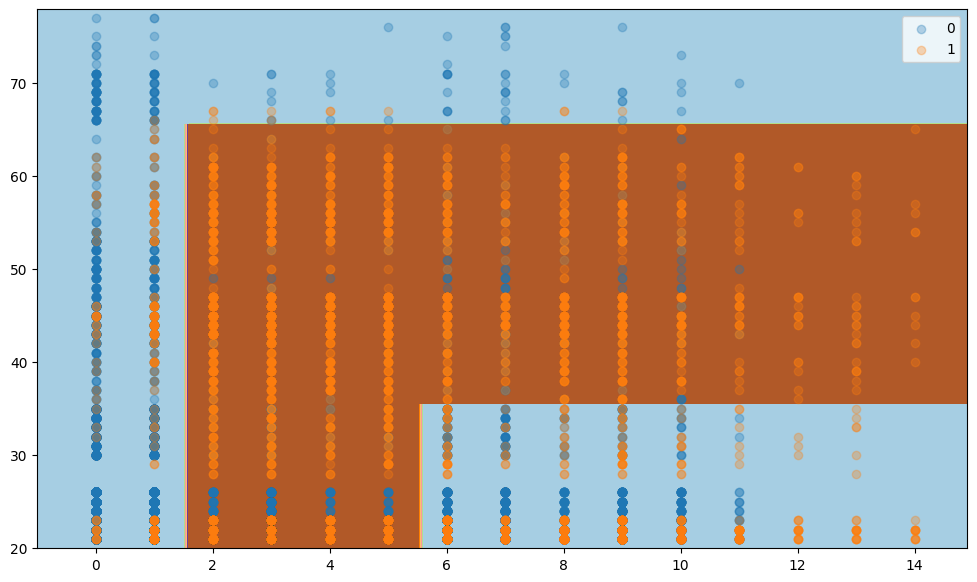

In [24]:
import numpy as np

plot_classification_surface(X_plot=np.array(X_train), y_plot=y_train, trained_model=model_tree)

              precision    recall  f1-score   support

           0       0.88      0.91      0.89      3000
           1       0.80      0.76      0.78      1500

    accuracy                           0.86      4500
   macro avg       0.84      0.83      0.84      4500
weighted avg       0.86      0.86      0.86      4500



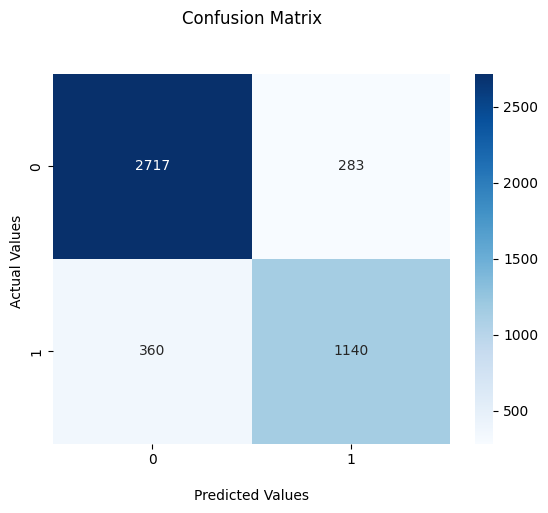

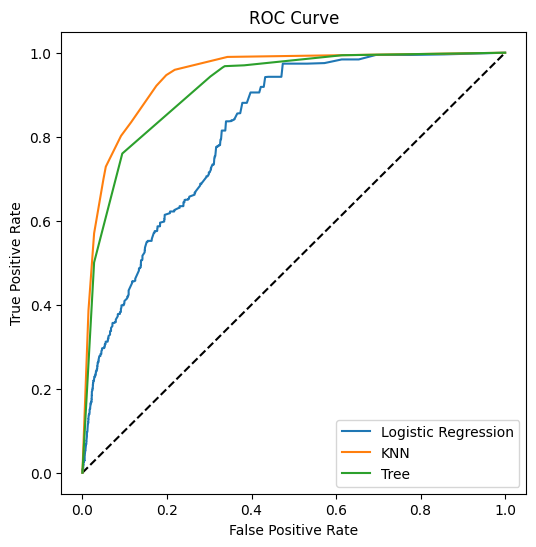

,Model,F1_score,AUC
0,Logistic Regression,0.580928,0.816493
1,KNN,0.808196,0.942804
2,Tree,0.780021,0.915466


In [25]:
calculate_metrics(model_tree, 'Tree', X_test, y_test)

# SVM (Support Vector Machines) - Maszyna wektorów nośnych

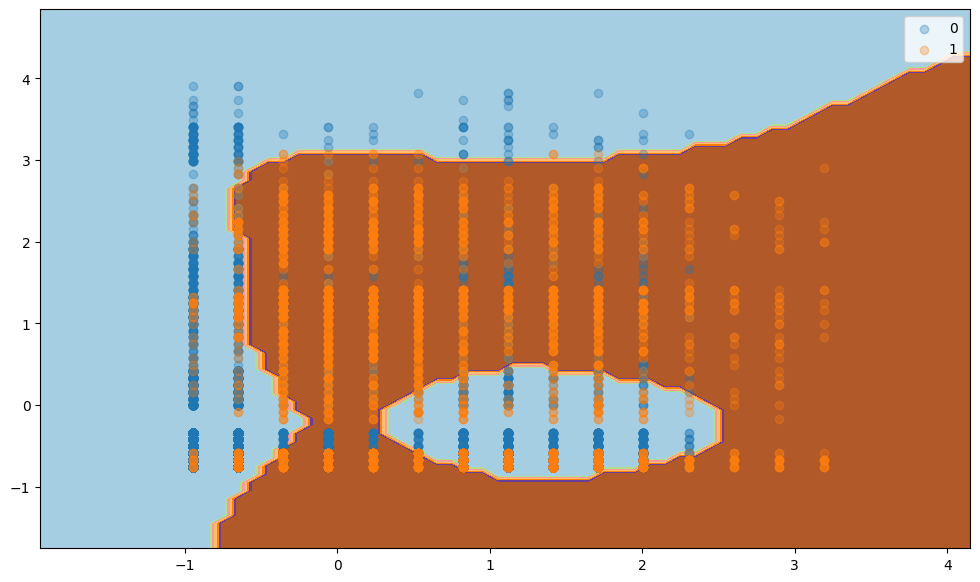

In [26]:
from sklearn.svm import SVC

model_svm = SVC(kernel='rbf', probability=True)
model_svm.fit(X_train_standardized, y_train)
plot_classification_surface(X_plot=X_train_standardized, y_plot=y_train, trained_model=model_svm)

              precision    recall  f1-score   support

           0       0.89      0.90      0.90      3000
           1       0.80      0.79      0.79      1500

    accuracy                           0.86      4500
   macro avg       0.85      0.84      0.85      4500
weighted avg       0.86      0.86      0.86      4500



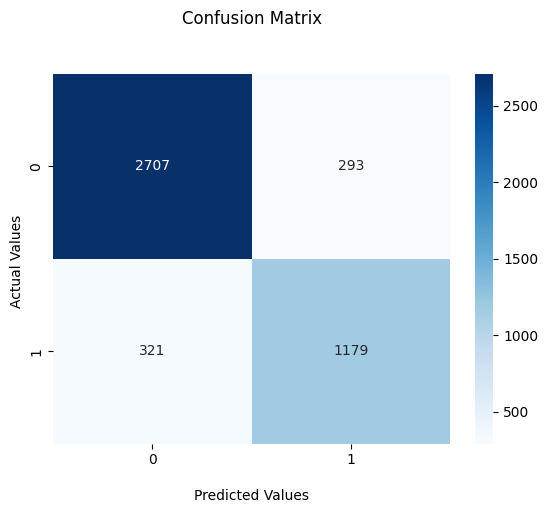

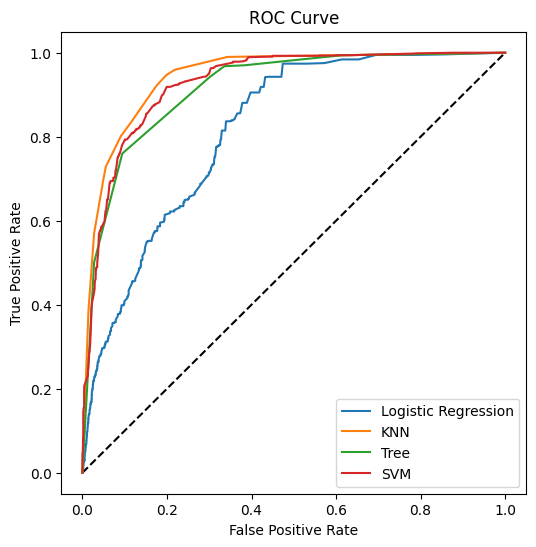

,Model,F1_score,AUC
0,Logistic Regression,0.580928,0.816493
1,KNN,0.808196,0.942804
2,Tree,0.780021,0.915466
3,SVM,0.793405,0.927973


In [27]:
calculate_metrics(model_svm, 'SVM', X_test_standardized, y_test)

# Ilość Drzew Decyzyjnych w RandomForest

C:\Users\GTata\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


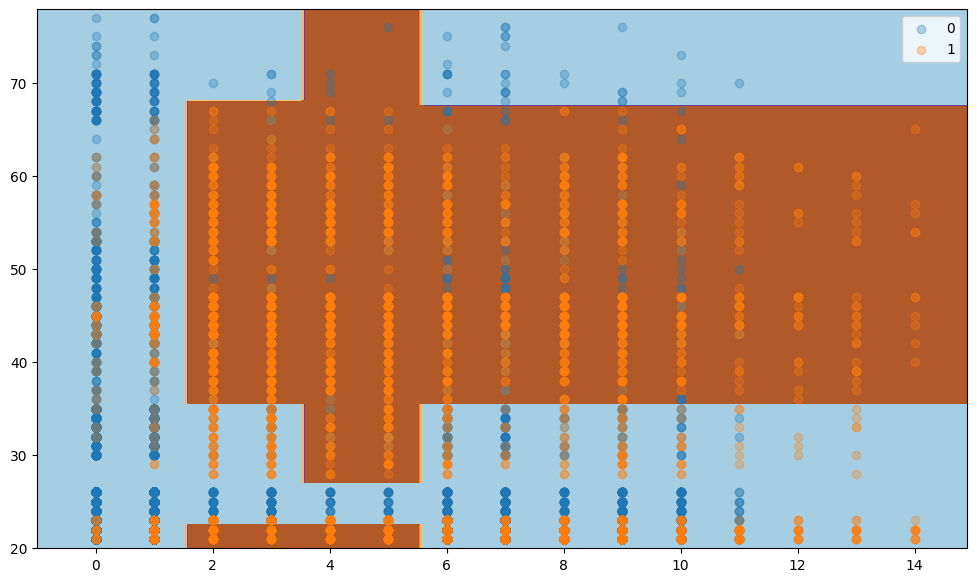

In [28]:
from sklearn.ensemble import RandomForestClassifier

model_forest = RandomForestClassifier(n_estimators=1000, max_depth=3, min_samples_leaf=int(X_train.shape[0]*0.001))
model_forest.fit(X_train, y_train)
plot_classification_surface(X_plot=np.array(X_train), y_plot=y_train, trained_model=model_forest)

              precision    recall  f1-score   support

           0       0.86      0.94      0.90      3000
           1       0.86      0.70      0.77      1500

    accuracy                           0.86      4500
   macro avg       0.86      0.82      0.83      4500
weighted avg       0.86      0.86      0.86      4500



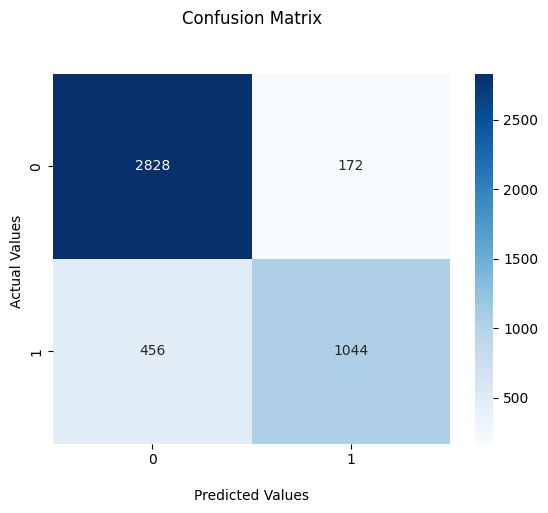

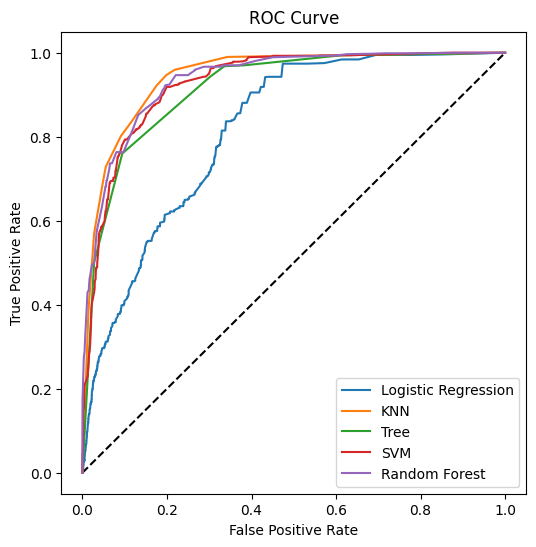

,Model,F1_score,AUC
0,Logistic Regression,0.580928,0.816493
1,KNN,0.808196,0.942804
2,Tree,0.780021,0.915466
3,SVM,0.793405,0.927973
4,Random Forest,0.768778,0.936622


In [29]:
calculate_metrics(model_forest, 'Random Forest', X_test, y_test)

# Boosting - AdaBoost

C:\Users\GTata\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(


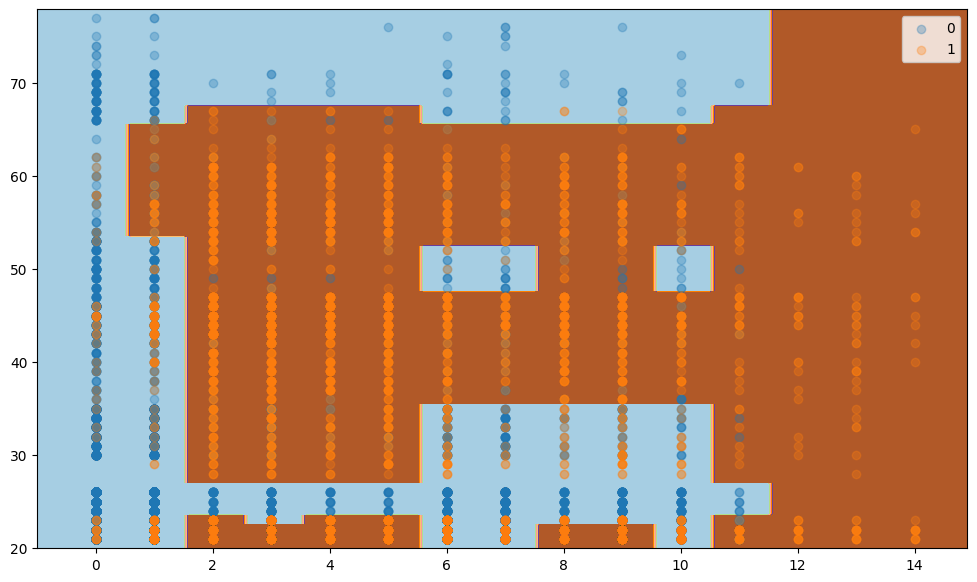

In [30]:
from sklearn.ensemble import AdaBoostClassifier

model_adaboost = AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=1), n_estimators=50)
model_adaboost.fit(X_train, y_train)
plot_classification_surface(X_plot=np.array(X_train), y_plot=y_train, trained_model=model_adaboost)

              precision    recall  f1-score   support

           0       0.92      0.91      0.91      3000
           1       0.82      0.84      0.83      1500

    accuracy                           0.88      4500
   macro avg       0.87      0.87      0.87      4500
weighted avg       0.89      0.88      0.88      4500



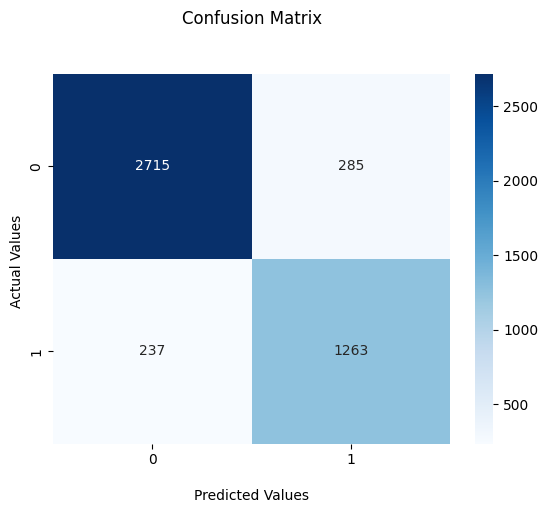

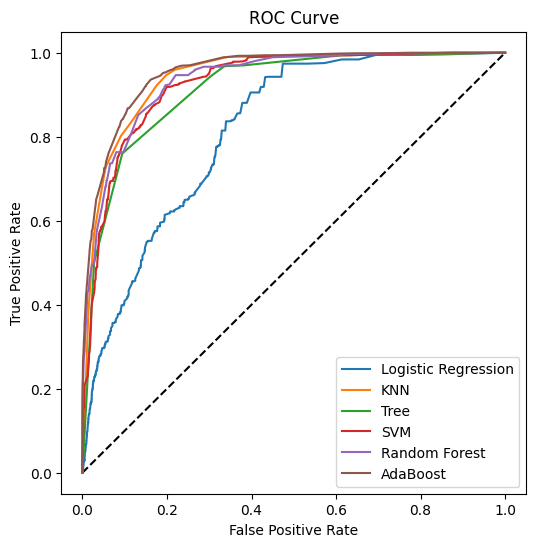

,Model,F1_score,AUC
0,Logistic Regression,0.580928,0.816493
1,KNN,0.808196,0.942804
2,Tree,0.780021,0.915466
3,SVM,0.793405,0.927973
4,Random Forest,0.768778,0.936622
5,AdaBoost,0.828740,0.953601


In [31]:
calculate_metrics(model_adaboost, 'AdaBoost', X_test, y_test)

# Ensembling – Zespół klasyfikatorów

## Voting Ensemble

C:\Users\GTata\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\GTata\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\Users\GTata\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(


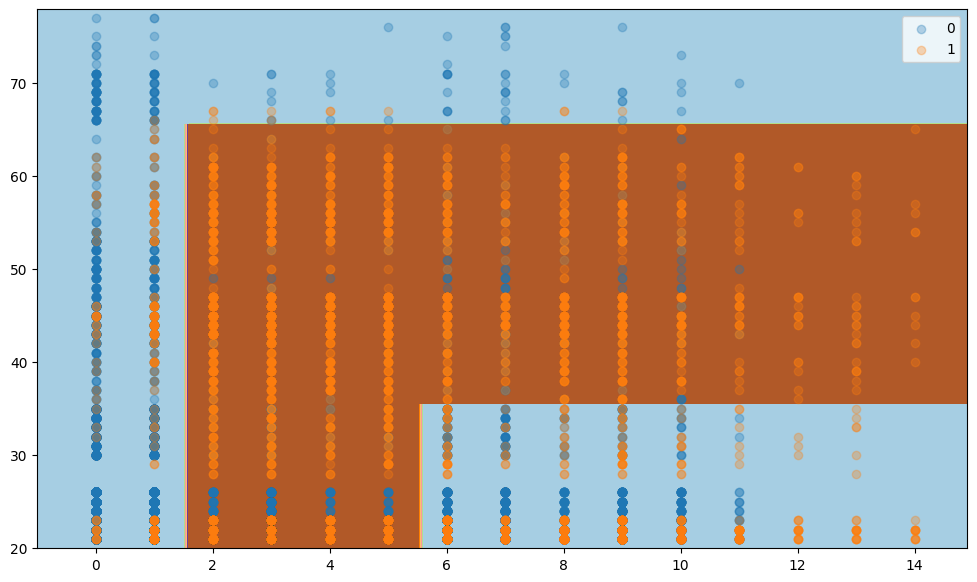

In [32]:
from sklearn.ensemble import VotingClassifier

model_voting = VotingClassifier(estimators=[('Tree', model_tree),
                                            ('Random Forest', model_forest),
                                            ('AdaBoost', model_adaboost)],
                                voting='soft')

model_voting.fit(X_train, y_train)
plot_classification_surface(X_plot=np.array(X_train), y_plot=y_train, trained_model=model_voting)

              precision    recall  f1-score   support

           0       0.88      0.91      0.89      3000
           1       0.80      0.76      0.78      1500

    accuracy                           0.86      4500
   macro avg       0.84      0.83      0.84      4500
weighted avg       0.86      0.86      0.86      4500



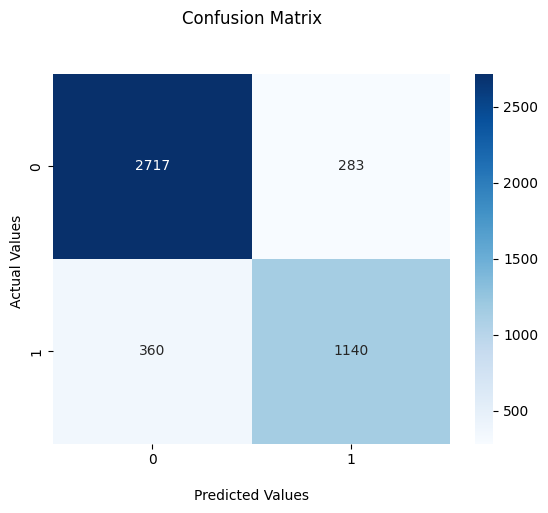

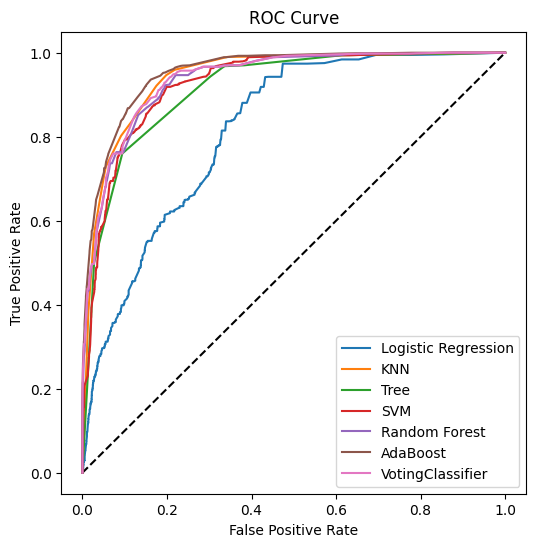

,Model,F1_score,AUC
0,Logistic Regression,0.580928,0.816493
1,KNN,0.808196,0.942804
2,Tree,0.780021,0.915466
3,SVM,0.793405,0.927973
4,Random Forest,0.768778,0.936622
5,AdaBoost,0.828740,0.953601
6,VotingClassifier,0.780021,0.939743


In [33]:
calculate_metrics(model_voting, 'VotingClassifier', X_test, y_test)

## Klasyfikacja na podstawie wielu zmiennych

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0, stratify=y)

In [35]:
from sklearn.model_selection import GridSearchCV

random_forest = RandomForestClassifier(n_estimators=1000, n_jobs=-1)
params_rf = {'max_depth': [3, 5, 10, 20],
             'min_samples_leaf': [3, 5, 10, 15]}
rf_gridsearch = GridSearchCV(random_forest,
                             params_rf,
                             scoring='f1_macro',
                             cv=5,
                             verbose=10, n_jobs=-1)
rf_gridsearch.fit(X_train, y_train)
print('\nBest hyperparameter:', rf_gridsearch.best_params_)
rf_model_v2 = rf_gridsearch.best_estimator_

Fitting 5 folds for each of 16 candidates, totalling 80 fits

Best hyperparameter: {'max_depth': 20, 'min_samples_leaf': 3}


              precision    recall  f1-score   support

           0       0.95      0.96      0.95      3000
           1       0.92      0.90      0.91      1500

    accuracy                           0.94      4500
   macro avg       0.93      0.93      0.93      4500
weighted avg       0.94      0.94      0.94      4500



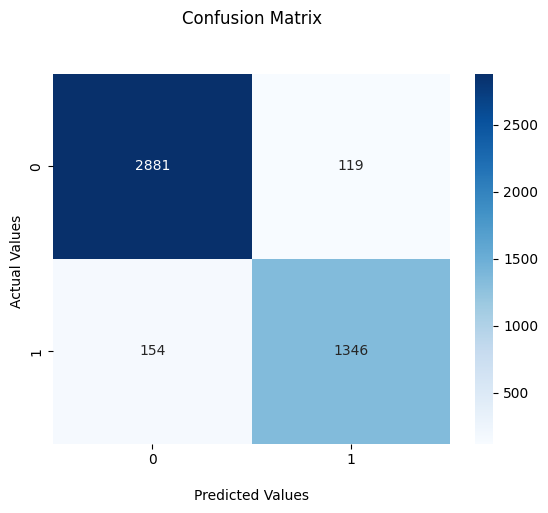

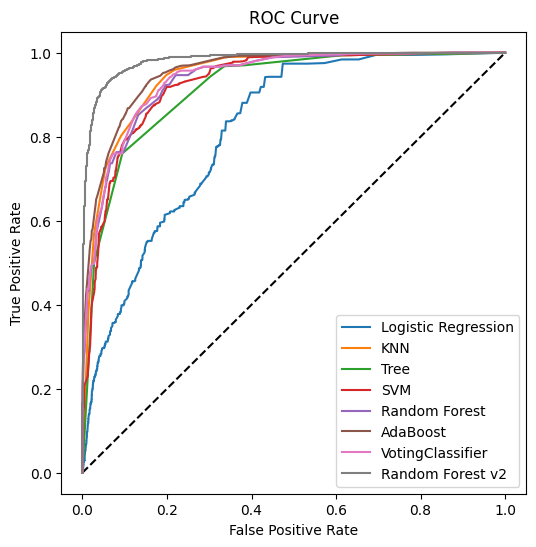

,Model,F1_score,AUC
0,Logistic Regression,0.580928,0.816493
1,KNN,0.808196,0.942804
2,Tree,0.780021,0.915466
3,SVM,0.793405,0.927973
4,Random Forest,0.768778,0.936622
5,AdaBoost,0.828740,0.953601
6,VotingClassifier,0.780021,0.939743
7,Random Forest v2,0.907926,0.982604


In [36]:
calculate_metrics(rf_model_v2, 'Random Forest v2', X_test, y_test)